In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from curvemetrics.datafetcher import DataFetcher
import timeit
from datetime import datetime, timedelta
import pandas as pd
from web3 import Web3
import matplotlib.pyplot as plt
from curvemetrics.datahandler import RawDataHandler
import json
from curvemetrics.queries import queries
import ccxt
from dotenv import load_dotenv
import os

In [41]:
def load_config():
    # Load the configuration
    with open(os.path.join(os.path.abspath('config.json')), "r") as config_file:
        config = json.load(config_file)
    return config

INFURA_KEY = os.getenv("INFURA_KEY")
config = load_config()

In [63]:
token_metadata = RawDataHandler().get_token_metadata()
datafetcher = DataFetcher(token_metadata=token_metadata)
firsts = {}
for token in token_metadata:
    if token_metadata[token]['symbol'] not in config['token_exchange_map']:
        continue
    api, source = config['token_exchange_map'][token_metadata[token]['symbol']]
    print(token_metadata[token]['symbol'], api, source)
    if api == "ccxt":
        exchange = getattr(ccxt, source)()
        ticker = datafetcher.get_symbol_for_token(token)
        print(ticker)
        ohlcv = exchange.fetch_ohlcv(ticker, since=None, timeframe='1d')
        firsts[token_metadata[token]['symbol']] = int(ohlcv[0][0]/1000)
    elif api == "chainlink":
        chainlink_address = Web3.to_checksum_address(source)
        abi = abi = '[{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"description","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"getRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"version","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]'
        client = Web3(Web3.HTTPProvider(f"https://mainnet.infura.io/v3/{INFURA_KEY}"))
        contract = client.eth.contract(address=chainlink_address, abi=abi)
        firsts[token_metadata[token]['symbol']] = contract.functions.getRoundData(18446744073709551617).call()[2]
{k:datetime.fromtimestamp(v).__str__() for k,v in firsts.items()}

Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7ff8d2e058d0>


stETH chainlink 0xCfE54B5cD566aB89272946F602D76Ea879CAb4a8
DAI ccxt binanceus
DAI/USD
BUSD chainlink 0x833D8Eb16D306ed1FbB5D7A2E019e106B960965A
FRAX chainlink 0xB9E1E3A9feFf48998E45Fa90847ed4D467E8BcfD
CRV ccxt binanceus
CRV/USD
MIM ccxt bitfinex2
MIM/USD
USDC ccxt binanceus
USDC/USD
sUSD chainlink 0xad35Bd71b9aFE6e4bDc266B345c198eaDEf9Ad94
cbETH ccxt coinbasepro
CBETH/USD
USDT ccxt binanceus
USDT/USD
ETH ccxt binanceus
ETH/USD
LUSD chainlink 0x3D7aE7E594f2f2091Ad8798313450130d0Aba3a0
UST ccxt coinbasepro
UST/USD


{'stETH': '2021-08-25 19:05:59',
 'DAI': '2021-12-26 00:00:00',
 'BUSD': '2021-04-30 01:46:14',
 'FRAX': '2021-08-09 20:57:35',
 'CRV': '2021-12-26 00:00:00',
 'MIM': '2023-01-30 00:00:00',
 'USDC': '2021-12-26 00:00:00',
 'sUSD': '2021-04-30 01:39:16',
 'cbETH': '2022-08-25 00:00:00',
 'USDT': '2021-12-26 00:00:00',
 'ETH': '2021-12-26 00:00:00',
 'LUSD': '2021-08-18 00:26:29',
 'UST': '2021-08-12 00:00:00'}

In [111]:
token_metadata

{'0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2': {'name': 'Wrapped Ether',
  'symbol': 'WETH',
  'decimals': 18,
  'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'},
 '0xae7ab96520de3a18e5e111b5eaab095312d7fe84': {'name': 'Liquid staked Ether 2.0',
  'symbol': 'stETH',
  'decimals': 18,
  'id': '0xae7ab96520de3a18e5e111b5eaab095312d7fe84'},
 '0x6b175474e89094c44da98b954eedeac495271d0f': {'name': 'Dai Stablecoin',
  'symbol': 'DAI',
  'decimals': 18,
  'id': '0x6b175474e89094c44da98b954eedeac495271d0f'},
 '0x4fabb145d64652a948d72533023f6e7a623c7c53': {'name': 'Binance USD',
  'symbol': 'BUSD',
  'decimals': 18,
  'id': '0x4fabb145d64652a948d72533023f6e7a623c7c53'},
 '0x853d955acef822db058eb8505911ed77f175b99e': {'name': 'Frax',
  'symbol': 'FRAX',
  'decimals': 18,
  'id': '0x853d955acef822db058eb8505911ed77f175b99e'},
 '0xd533a949740bb3306d119cc777fa900ba034cd52': {'name': 'Curve DAO Token',
  'symbol': 'CRV',
  'decimals': 18,
  'id': '0xd533a949740bb3306d119cc777fa900ba034cd52'},
 '0

In [109]:
exchange = ccxt.coinbasepro()
ohlcv = exchange.fetch_ohlcv('CBETH/USD', since=1661439999900, timeframe='1m')
ohlcv

[[1661444040000, 1647.0, 1647.0, 1636.49, 1638.75, 1.14866],
 [1661444160000, 1634.93, 1638.75, 1634.93, 1634.99, 0.02208],
 [1661444220000, 1634.99, 1636.55, 1634.99, 1636.55, 0.32265],
 [1661444280000, 1636.87, 1638.75, 1636.87, 1638.75, 1.07422],
 [1661444340000, 1638.1, 1638.75, 1637.93, 1638.75, 0.32004],
 [1661444400000, 1641.0, 1641.0, 1639.45, 1639.84, 0.14603],
 [1661444460000, 1639.46, 1639.46, 1639.42, 1639.44, 0.13929],
 [1661444520000, 1639.42, 1639.42, 1634.48, 1635.8, 6.78171],
 [1661444700000, 1634.14, 1634.97, 1634.14, 1634.97, 1.35648],
 [1661444760000, 1635.52, 1635.52, 1621.63, 1621.63, 5.8977],
 [1661444820000, 1635.5, 1635.5, 1634.11, 1634.81, 0.68344],
 [1661445000000, 1622.4, 1622.4, 1610.0, 1610.0, 14.0062],
 [1661445060000, 1610.0, 1610.0, 1600.0, 1600.0, 9.46649],
 [1661445120000, 1600.0, 1634.81, 1600.0, 1600.0, 35.67046],
 [1661445180000, 1600.0, 1601.68, 1569.12, 1601.68, 18.59077],
 [1661445240000, 1572.82, 1621.0, 1550.0, 1599.43, 2.129],
 [1661445300000

In [168]:
datahandler = RawDataHandler()
token_metadata = datahandler.get_token_metadata()
pool_metadata = datahandler.get_pool_metadata()

In [169]:
# TODO: Put this in a config file
CHAINLINK_ADDRESSES = {
    "BUSD" : "0x833D8Eb16D306ed1FbB5D7A2E019e106B960965A",
    "stETH" : "0xCfE54B5cD566aB89272946F602D76Ea879CAb4a8",
    "sUSD" : "0xad35Bd71b9aFE6e4bDc266B345c198eaDEf9Ad94",
    "LUSD" : "0x3D7aE7E594f2f2091Ad8798313450130d0Aba3a0",
    "FRAX" : "0xB9E1E3A9feFf48998E45Fa90847ed4D467E8BcfD",     
}

In [185]:
token = "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48"
token_symbol = token_metadata[token]['symbol']
token_data = datafetcher.get_ohlcv(1677708431, 1677794855, token, default_exchange="binanceus")

Using Binance US for USDC/USD.



In [188]:
token_data[0]

['0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
 'USDC/USD',
 1677708840000,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0]

In [193]:
'BUSD / USD'.replace(" ", "")

'BUSD/USD'

In [196]:
datetime.fromtimestamp(1677794855)

datetime.datetime(2023, 3, 2, 22, 7, 35)

In [190]:
token_metadata

{'0x853d955acef822db058eb8505911ed77f175b99e': {'name': 'Frax',
  'symbol': 'FRAX',
  'decimals': 18,
  'id': '0x853d955acef822db058eb8505911ed77f175b99e'},
 '0x5e8422345238f34275888049021821e8e08caa1f': {'name': 'Frax Ether',
  'symbol': 'frxETH',
  'decimals': 18,
  'id': '0x5e8422345238f34275888049021821e8e08caa1f'},
 '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48': {'name': 'USD Coin',
  'symbol': 'USDC',
  'decimals': 6,
  'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48'},
 '0x99d8a9c45b2eca8864373a26d1459e3dff1e17f3': {'name': 'Magic Internet Money',
  'symbol': 'MIM',
  'decimals': 18,
  'id': '0x99d8a9c45b2eca8864373a26d1459e3dff1e17f3'},
 '0xa693b19d2931d498c5b318df961919bb4aee87a5': {'name': 'UST',
  'symbol': 'UST',
  'decimals': 6,
  'id': '0xa693b19d2931d498c5b318df961919bb4aee87a5'},
 '0xbe9895146f7af43049ca1c1ae358b0541ea49704': {'name': 'Coinbase Wrapped Staked ETH',
  'symbol': 'cbETH',
  'decimals': 18,
  'id': '0xbe9895146f7af43049ca1c1ae358b0541ea49704'},
 '0x62b9c73

In [17]:
pool = "0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7"
pool_data = datahandler.get_pool_data(pool)
pool_data.head()

,id,pool_id,block,totalValueLockedUSD,inputTokenBalances,inputTokenWeights,approxTimestamp
approxTimestamp,,,,,,,
2023-03-01 00:00:11,4525,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16734785,5.035267e+08,"[178468252210905614644773190, 191549543020955,...","[34.61580159858987, 37.153056049869, 28.231142...",1677628811
2023-03-01 00:00:23,4526,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16736825,5.106188e+08,"[179637950681333102219499636, 191006959233857,...","[34.35867318863638, 36.53318056780329, 29.1081...",1677628823
2023-03-01 00:00:35,4527,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16734786,5.035267e+08,"[178468252210905614644773190, 190318919084570,...","[34.61580906711379, 36.91437151020846, 28.4698...",1677628835
2023-03-01 00:00:47,4528,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16736826,5.106188e+08,"[179637950681333102219499636, 191006959233857,...","[34.35867318863638, 36.53318056780329, 29.1081...",1677628847
2023-03-01 00:00:59,4529,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16734787,5.035267e+08,"[178468252210905614644773190, 190318919084570,...","[34.61580906711379, 36.91437151020846, 28.4698...",1677628859


In [23]:
for token, metadata in token_metadata.items():
    token_symbol = metadata['symbol'].replace('/', '-')
    try:
        token_ohlcv = datahandler.get_ohlcv_data(token)
        token_ohlcv.to_csv(f"./data/rawdata/{token_symbol}_ohlcv.csv")
        print(f"Saved {token_symbol} OHLCV data")
    except Exception as e:
        print(f"Error saving {token_symbol} OHLCV data: {e}")

Saved FRAX OHLCV data
Error saving frxETH OHLCV data: 'timestamp'
Saved USDC OHLCV data
Saved MIM OHLCV data
Error saving UST OHLCV data: 'timestamp'
Saved cbETH OHLCV data
Error saving cvxCRV OHLCV data: 'timestamp'
Error saving sUSD OHLCV data: 'timestamp'
Saved ETH OHLCV data
Saved USDT OHLCV data
Error saving WETH OHLCV data: 'timestamp'
Saved CRV OHLCV data
Error saving stETH OHLCV data: 'timestamp'
Saved BUSD OHLCV data
Error saving 3Crv OHLCV data: 'timestamp'
Saved DAI OHLCV data
Error saving LUSD OHLCV data: 'timestamp'
Error saving USDN OHLCV data: 'timestamp'


In [20]:
for pool, metadata in pool_metadata.items():
    pool_name = metadata['symbol'].replace('/', '-')

    pool_data = datahandler.get_pool_data(pool)
    pool_data.to_csv(f"./data/rawdata/{pool_name}_pool_data.csv")

    lp_events = datahandler.get_lp_data(pool)
    lp_events.to_csv(f"./data/rawdata/{pool_name}_lp_events.csv")

    swaps = datahandler.get_swaps_data(pool)
    swaps.to_csv(f"./data/rawdata/{pool_name}_swaps.csv")

In [41]:
for token in token_metadata:
    try:
        metrics_for_token(token, datahandler, token_metadata)
    except:
        print(f"Error for token {token_metadata[token]['symbol']}")

Error for token frxETH
Error for token UST
Error for token cvxCRV
Error for token sUSD
Error for token WETH
Error for token stETH
Error for token 3Crv
Error for token LUSD
Error for token USDN


In [45]:
for pool in pool_metadata:
    try:
        print(f"Processing pool {pool_metadata[pool]['symbol']}")
        metrics_for_pool(pool, datahandler, pool_metadata, token_metadata)
    except Exception as e:
        print(f"Error for pool {pool_metadata[pool]['symbol']}: {e}")

Processing pool 3Crv
Processing pool steCRV
Processing pool crvFRAX
Processing pool UST_whv23CRV-f
Processing pool usdn3CRV
Processing pool MIM-3LP3CRV-f
Processing pool crvPlain3andSUSD
Processing pool frxETHCRV
Processing pool LUSD3CRV-f
Processing pool BUSD3CRV-f
Processing pool STETHETH_C-f
Processing pool cbETH/ETH-f
Error for pool cbETH/ETH-f: Cannot save file into a non-existent directory: 'tmpdata/cbETH'
Processing pool cvxcrv-crv-f


In [15]:
pool_data = datahandler.get_pool_data(pool)
swaps_data = datahandler.get_swaps_data(pool)
lp_data = datahandler.get_lp_data(pool)

<Axes: xlabel='timestamp'>

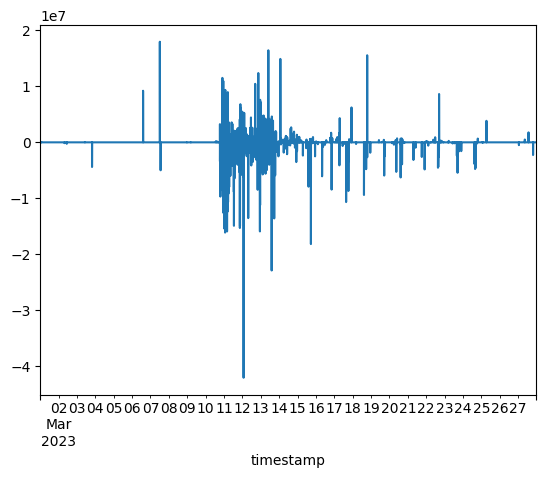

In [25]:
gini_data = gini(pool_data)
shannon_data = shannons_entropy(pool_data)

metrics = []

for token_idx, token_id in enumerate(pool_metadata[pool]['coins']):
    token_ohlcv = datahandler.get_ohlcv_data(token_id)
    metrics.append(net_swap_flow(swaps_data, token_id, token_metadata[token_id]['symbol']))
    metrics.append(net_lp_flow(lp_data, token_idx, token_metadata[token_id]['symbol']))
    metrics.append(log_returns(token_ohlcv, token_metadata[token_id]['symbol']))
metrics_df = pd.concat(metrics, axis=1)
metrics_df = metrics_df.fillna(0)

In [104]:
metrics_df

,giniCoefficient,shannonsEntropy,DAI.netSwapFlow,USDC.netSwapFlow,USDT.netSwapFlow,DAI.netLPFlow,USDC.netLPFlow,USDT.netLPFlow,DAI.logReturns,USDC.logReturns,USDT.logReturns
2023-03-10 00:00:00,0.063709,1.573687,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0
2023-03-10 00:01:00,0.063601,1.573742,149886.959338,-151891.9253,1992.02007,0.0,0.0,0.0,0.007414,0.0007,0.0
2023-03-10 00:02:00,0.063601,1.573742,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,0.0008,0.0
2023-03-10 00:03:00,0.063601,1.573742,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0
2023-03-10 00:04:00,0.064507,1.573233,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-10 16:36:00,0.000000,0.000000,0.000000,0.0000,0.00000,0.0,0.0,0.0,-0.011722,0.0000,0.0
2023-03-10 16:37:00,0.000000,0.000000,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0
2023-03-10 16:38:00,0.000000,0.000000,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,0.0000,0.0
2023-03-10 16:39:00,0.000000,0.000000,0.000000,0.0000,0.00000,0.0,0.0,0.0,0.000000,-0.0008,0.0


<Axes: >

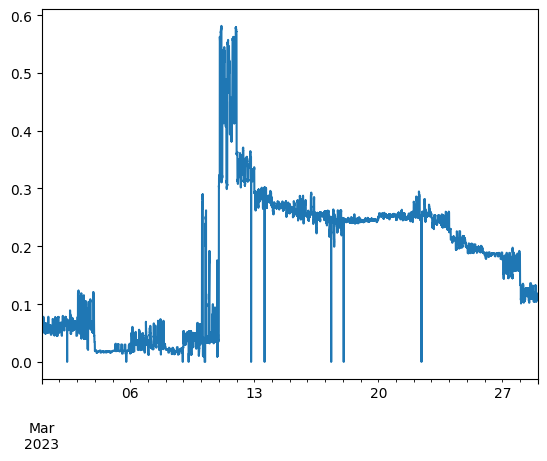

In [33]:
metrics_df['giniCoefficient'].plot()

In [171]:
STEP_SIZE = 10 # NOTE: increasing this risks losing txs, 10 is probably safe
start = datetime(2023, 3, 10)
start_timestamp, start_block = DataFetcher.get_block(start)
end = datetime(2023, 3, 10, 1)
end_timestamp, end_block = DataFetcher.get_block(end)

datafetcher = DataFetcher(token_metadata=token_metadata)

pool = '0xceaf7747579696a2f0bb206a14210e3c9e6fb269'
token = '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48'

In [100]:
token_data = datafetcher.get_ohlcv(start_timestamp, end_timestamp, token)
pool_data = datafetcher.get_pool_data(start_block, end_block, pool, step_size=1)
swaps_data = datafetcher.get_swaps_data(start_block, end_block, pool, step_size=STEP_SIZE)
lp_data = datafetcher.get_lp_data(start_block, end_block, pool, step_size=STEP_SIZE)

Fetching OHLCV for USDC/USD using Binance US...
Fetching OHLCV for USDC/USD using Binance US...


In [80]:
token_data_df = RawDataHandler.format_token_data(token_data)
pool_df = RawDataHandler.format_pool_data(pool_data, datafetcher.start_timestamp, datafetcher.end_timestamp)
swaps_df = RawDataHandler.format_swaps_data(swaps_data)
lp_df = RawDataHandler.format_lp_data(lp_data)

In [165]:
exchange = ccxt.mexc3()
exchange.fetch_ohlcv("USDN/USDT", since=1667339268*1000, timeframe='1d', limit=100)

[[1674950400000, 0.3319, 0.3394, 0.3315, 0.3327, 124904.57],
 [1675036800000, 0.3327, 0.3354, 0.3117, 0.318, 130005.85],
 [1675123200000, 0.318, 0.3284, 0.3033, 0.3149, 132879.22],
 [1675209600000, 0.3149, 0.323, 0.2951, 0.2998, 140914.08],
 [1675296000000, 0.2998, 0.32, 0.2941, 0.3098, 140465.8],
 [1675382400000, 0.3098, 0.32, 0.2987, 0.312, 137210.38],
 [1675468800000, 0.312, 0.3283, 0.3096, 0.3256, 130469.71],
 [1675555200000, 0.3256, 0.3347, 0.3055, 0.3066, 134655.62],
 [1675641600000, 0.3066, 0.3235, 0.2826, 0.3197, 134920.22],
 [1675728000000, 0.3197, 0.3397, 0.3065, 0.309, 131385.31],
 [1675814400000, 0.309, 0.3221, 0.2886, 0.3126, 106492.31],
 [1675900800000, 0.3126, 0.3543, 0.3122, 0.3212, 132661.06],
 [1675987200000, 0.3212, 0.3235, 0.3062, 0.3121, 94012.65],
 [1676073600000, 0.3121, 0.3132, 0.2767, 0.2907, 140485.95],
 [1676160000000, 0.2907, 0.2954, 0.2714, 0.2769, 141418.0],
 [1676246400000, 0.2769, 0.2825, 0.2701, 0.2786, 147060.05],
 [1676332800000, 0.2786, 0.2787, 0.261

In [34]:
for exchange_id in ccxt.exchanges:
    exchange = getattr(ccxt, exchange_id)()
    try:
        exchange.load_markets()
        for market in exchange.markets.keys():
            if "USDN" in market or "USDn" in market:
                print(f'{exchange_id}, {market}')
    except Exception as e:
        print(f'{exchange_id}, failed.')

binance, failed.
binancecoinm, failed.
binanceusdm, failed.
bitflyer, failed.
bittrex, USDN/BTC
bittrex, USDN/USDT
coinbase, failed.
gate, USDN/USDT
gateio, USDN/USDT
hitbtc, USDN/USDT
hitbtc3, USDN/USDT
kuna, failed.
mexc, USDN/USDT
mexc3, USDN/USDT
okcoin, failed.
tidex, failed.
tokocrypto, failed.


# Missing Txs
We show that if you increase the step_size between block_gte and block_lt you start losing transactions because theGraph has a rate limit of 100 rows per response.

In [ ]:
start = datetime(2023, 3, 11)
end = datetime(2023, 3, 13)
datafetcher = DataFetcher(start, end)
_3pool = '0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7'

In [ ]:
swaps_data_1 = datafetcher.get_swaps_data('3pool', step_size=1)
swaps_data_10 = datafetcher.get_swaps_data('3pool', step_size=10)
swaps_data_50 = datafetcher.get_swaps_data('3pool', step_size=50)
swaps_data_100 = datafetcher.get_swaps_data('3pool', step_size=100)

swaps_df_1 = RawDataHandler.format_swaps_data(swaps_data_1)
swaps_df_10 = RawDataHandler.format_swaps_data(swaps_data_10)
swaps_df_50 = RawDataHandler.format_swaps_data(swaps_data_50)
swaps_df_100 = RawDataHandler.format_swaps_data(swaps_data_100)

print(swaps_df_1.shape)
print(swaps_df_10.shape)
print(swaps_df_50.shape)
print(swaps_df_100.shape)

In [59]:
missing = set(swaps_df_10['id']) - set(swaps_df_100['id'])
missing_eg = missing.pop()
swaps_df_10[swaps_df_10['id']==missing_eg]

,id,amountBought,amountSold,block,buyer,gasLimit,gasUsed,isUnderlying,timestamp,tokenBought,tokenSold,tx,pool_id,block_gte,block_lt
16058,0xdc50a0d779d4c5792f32e1a9a5ba2914f58aa654bb79...,340929.942491,331341.859263,16804730,0xdecf04ca46d287b3cb99692ad512e568ba276140,601141,360441,0,1678536347,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x6b175474e89094c44da98b954eedeac495271d0f,0xdc50a0d779d4c5792f32e1a9a5ba2914f58aa654bb79...,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16804724,16804734


In [78]:
CURVE_SUBGRAPH_URL_CVX = 'https://api.thegraph.com/subgraphs/name/convex-community/curve-mainnet'
block = 16804725
query = queries['swapEvents']
kwargs = {'pool_id':'0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7', 'block_gte':block, 'block_lt':block+40}
out = await datafetcher.execute_query_async(query, 'swapEvents', CURVE_SUBGRAPH_URL_CVX, **kwargs)
out_df = RawDataHandler.format_swaps_data([out])
print(len(out_df))
# out_df[out_df['id'] == '0xdc50a0d779d4c5792f32e1a9a5ba2914f58aa654bb79ad59d0daf319692bac5b-340929.942491-131']

89


In [45]:
CURVE_SUBGRAPH_URL_CVX = 'https://api.thegraph.com/subgraphs/name/convex-community/curve-mainnet'
query = queries['swapEvents']
kwargs = {'pool_id':'0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7', 'block_gte':16804686, 'block_lt':16804735}
out = await datafetcher.execute_query_async(query, 'swapEvents', CURVE_SUBGRAPH_URL_CVX, **kwargs)
out_df = RawDataHandler.format_swaps_data([out])
out_df[out_df['id'] == '0xdc50a0d779d4c5792f32e1a9a5ba2914f58aa654bb79ad59d0daf319692bac5b-340929.942491-131']

,id,amountBought,amountSold,block,buyer,gasLimit,gasUsed,isUnderlying,timestamp,tokenBought,tokenSold,tx,pool_id,block_gte,block_lt
